In [2]:
import warnings
from skfuzzy import control as ctrl
import skfuzzy as fuzz
import numpy as np

%matplotlib inline
warnings.filterwarnings('ignore')

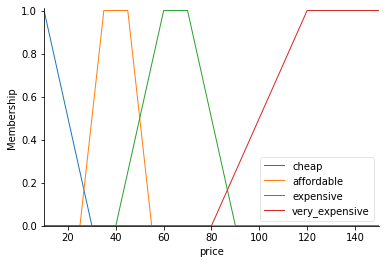

In [20]:
price = ctrl.Antecedent(np.arange(10, 151, 1), 'price')

price['cheap'] = fuzz.trimf(price.universe, [10, 10, 30])
price['affordable'] = fuzz.trapmf(price.universe, [25, 35, 45, 55])
price['expensive'] = fuzz.trapmf(price.universe, [40, 60, 70, 90])
price['very_expensive'] = fuzz.trapmf(price.universe, [80, 120, 150, 150])

price.view()


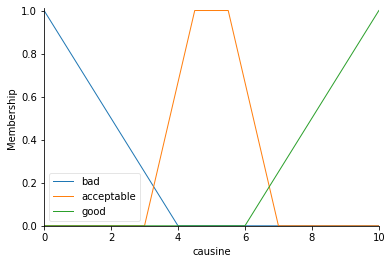

In [33]:
causine = ctrl.Antecedent(np.arange(0, 10.5, 0.5), 'causine')

causine['bad'] = fuzz.trimf(causine.universe, [0, 0, 4])
causine['acceptable'] = fuzz.trapmf(causine.universe, [3, 4.5, 5.5, 7])
causine['good'] = fuzz.trimf(causine.universe, [6, 10, 10])

causine.view()


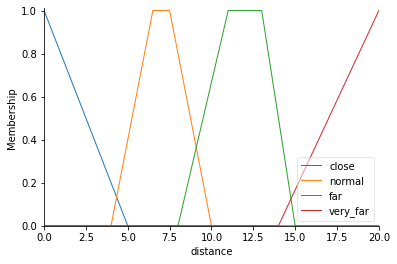

In [37]:
distance = ctrl.Antecedent(np.arange(0, 20.5, 0.5), 'distance')

distance['close'] = fuzz.trimf(distance.universe, [0, 0, 5])
distance['normal'] = fuzz.trapmf(distance.universe, [4, 6.5, 7.5, 10])
distance['far'] = fuzz.trapmf(distance.universe, [8, 11, 13, 15])
distance['very_far'] = fuzz.trimf(distance.universe, [14, 20, 20])

distance.view()


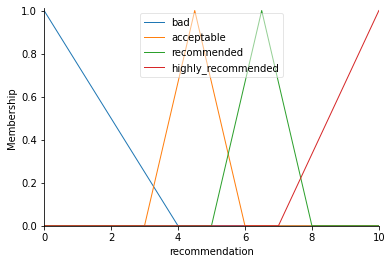

In [43]:
recommendation = ctrl.Consequent(np.arange(0, 10.5, 0.5), 'recommendation')

recommendation['bad'] = fuzz.trimf(recommendation.universe, [0, 0, 4])
recommendation['acceptable'] = fuzz.trimf(recommendation.universe, [3, 4.5, 6])
recommendation['recommended'] = fuzz.trimf(recommendation.universe, [5, 6.5, 8])
recommendation['highly_recommended'] = fuzz.trimf(recommendation.universe, [7, 10, 10])

recommendation.view()


In [44]:
recommendation_ctrl = ctrl.ControlSystem([
    ctrl.Rule(price['very_expensive'] & causine['bad'] & distance['very_far'], recommendation['bad'])
])


In [45]:
recommender = ctrl.ControlSystemSimulation(recommendation_ctrl)

In [50]:
recommender.input['price'] = 100
recommender.input['causine'] = 1
recommender.input['distance'] = 18


recommender.compute()


1.555555555555556


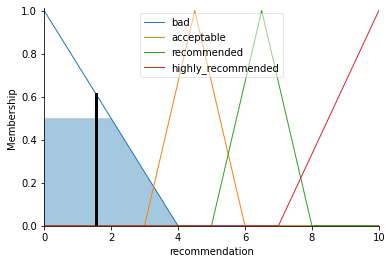

In [51]:
print(recommender.output['recommendation'])
recommendation.view(sim=recommender)
